In [1]:
import pandas as pd
import numpy as np
from keras import models,layers,optimizers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(tr_img,tr_label),(test_img,test_label)=mnist.load_data()

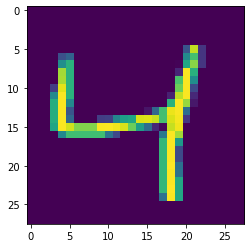

In [3]:
plt.imshow(tr_img[2])

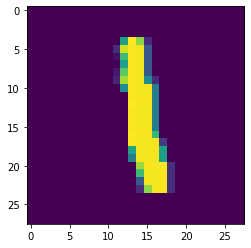

In [4]:
plt.imshow(tr_img[6])

In [5]:
def preparation(df):
    df=df/255 #normalization
    df=df.reshape(-1,28,28,1)
    return df

In [6]:
tr_img.shape

(60000, 28, 28)

In [7]:
tr_img=preparation(tr_img)
test_img=preparation(test_img)

In [8]:
tr_img.shape

(60000, 28, 28, 1)

In [9]:
np.unique(tr_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
tr_label = to_categorical(tr_label, num_classes = 10)
test_label = to_categorical(test_label, num_classes = 10)

In [11]:
tr_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tr_img, tr_label, test_size = 0.2, random_state = 0)

In [13]:
#data augmentation
datagen= ImageDataGenerator(rotation_range=10, zoom_range = 0.2, width_shift_range=0.1, height_shift_range=0.1)  
data=datagen.flow(X_train, y_train)

In [14]:
data_aug=data.next()
a = data_aug[1] #labels of first batch,
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 

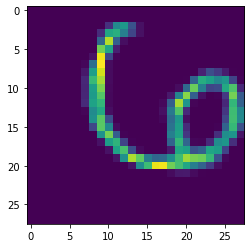

In [15]:
x = data_aug[0] 
plt.imshow(x[5])
plt.show() 

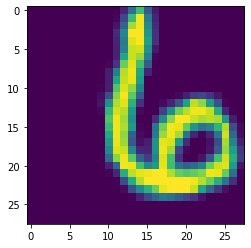

In [21]:
plt.imshow(x[4])
plt.show() 

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add((layers.Flatten()))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [19]:
model.fit(data, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.4139 - accuracy: 0.8650 - val_loss: 0.0856 - val_accuracy: 0.9732
Epoch 2/5
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1834 - accuracy: 0.9453 - val_loss: 0.0793 - val_accuracy: 0.9757
Epoch 3/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1540 - accuracy: 0.9540 - val_loss: 0.1014 - val_accuracy: 0.9680
Epoch 4/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1380 - accuracy: 0.9582 - val_loss: 0.0835 - val_accuracy: 0.9775
Epoch 5/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1308 - accuracy: 0.9621 - val_loss: 0.0527 - val_accuracy: 0.9853


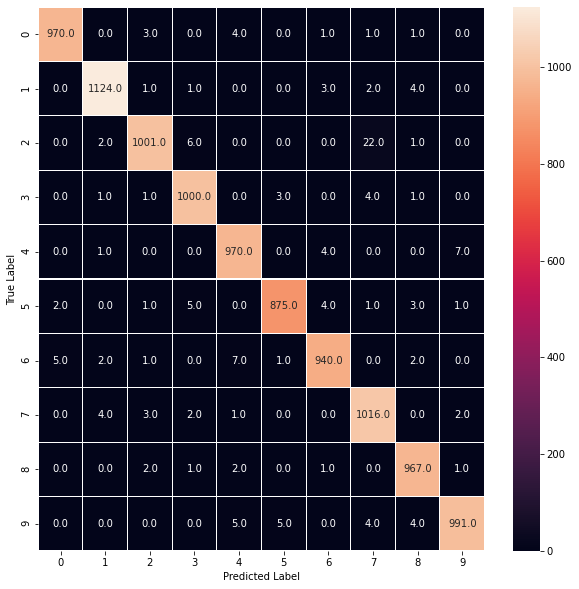

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_img)
classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(test_label,axis = 1)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_true,classes), annot=True, linewidths=0.01, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()